# Lab 2: Feature Based Classifier

Debe formar grupo de hasta 3 personas para los laboratorios.

__Estudiante 1:__ Leonardo Achá Boiano  \
__Estudiante 2:__ Bruno Ramiro Rejas Montero \
__Estudiante 3:__ Matias Adorno Mazoccato \
__Estudiante 4:__ Adrian Livio Carhuaz Encinas 

__Fecha de inicio:__ 28 de Marzo del 2023 \
__Fecha de entrega:__ 8 de Abril del 2023 (11:59 pm)

---
## Pipeline

Recuerde que para cualquier proyecto de Vision computacional es necesario realizar la pipeline mostrada a continuacion (Tambine revisada durante las lecciones):

<img src="images/pipeline.png" width="80%" height="80%">

Durante este laboratorio realizaran cada una de las etapas de esta pipeline!! 

1. Input Data - extraer la informacion, imagenes
2. Segmentacion - preprocesamineto de la imagen, estandarizar, reducir ruido, etc 
3. Descripcion - encontrar un vector de caracteristicas 
4. Clasificacion - mediante el uso de los vectores de caracteristicas clasificar la imagen en su clase, label, correspondiente. Note que en este laboratorio no se estara usando ningun algoritmo de Machine Learning o Deep Learning. Este clasificador, o tambien conocido como `modelo`, sera un clasificador basado unicamente en el vector de caracteristicas!


---

__Objective__: Construir un clasificador para imágenes de semáforos. Dado un dataset de imágenes de semáforos en las que se ilumina una de tres luces: `red`, `yellow` o `green`.

En esta notebook, se preprocesará estas imágenes, se extraerá features que nos ayudarán a distinguir los diferentes tipos de imágenes y se  usará esas features para clasificar las imágenes de semáforos en tres clases: `red`, `yellow`, or `green`. Para ello se debe realizar los siguientes pasos:

1. **Loading and visualizing the data**.

2. **Pre-processing**. 
    
3. **Feature extraction**. 
   
4. **Classification and visualizing error**. 
    
5. **Evaluate your model**.
    
    
Puede ver algunas imagenes del dataset (red, green, y yellow traffic lights):
<img src="images/all_lights.png" width="50%" height="50%">


---
### IMPORTANT

Hay un par de preguntas sobre sus pensamientos mientras trabaja en este laboratorio, que están marcadas con **'(QUESTION)'**. Asegúrese de responder todas las preguntas.

También hay **' TODO '**, que son necesarios para completar el laboratorio. Por favor, en estas celdas asegúrese de agregar su implementación.

La presentación de su proyecto se evaluará en función de las implementaciones del código que proporcione, las respuestas a las preguntas y dos requisitos principales de clasificación.

### Requirements:

1. **Greater than 90% accuracy**
2. ***Never* classify red lights as green**


---
### Import resources

No es necesario que importe otras librerias.

In [310]:
import cv2 
import helpers

import random
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

---
# 1. Loading and Visualizing the Dataset

El primer paso en cualquier problema de clasificación es familiarizarse con sus datos; Se tendra que cargar las imágenes de los semáforos y visualizarlas!

Este dataset de semáforos consta de 1484 imágenes en color en 3 categorías: `red`, `yellow`, y `green`. Como ocurre con la mayoría de los datos de origen humano, los datos no se distribuyen uniformemente entre de los tipos. Por tant, tenemos:
* 904 de semaforos marcando rojo 'red'
* 536 de semaforos marcando verde 'green'
* 44 de semaforos marcando amarillo 'yellow'

## Training and Testing Data

Las 1484 imágenes de semáforos se separan en training dataset y test dataset.

* 80% de estas imágenes son imágenes de entrenamiento, para que las use mientras crea el clasificador.
* 20% son imágenes de prueba, que se utilizarán para probar la precisión de su clasificador.
* Se asegura que todas las imágenes son imágenes de semáforos de 3 luces con una luz encendida.

## Define the image directories

Primero, configuramos algunas variables para realizar un seguimiento de algunos lugares donde se almacenan nuestras imágenes:

    IMAGE_DIR_TRAINING: el directorio donde se almacenan nuestros datos de imagen de entrenamiento
    IMAGE_DIR_TEST: el directorio donde se almacenan los datos de nuestra imagen de prueba

In [311]:
# TODO: Image data directories
IMAGE_DIR_TRAINING = "traffic_light_images/training"
IMAGE_DIR_TEST = "traffic_ligh_images/test"

## Load the datasets

`IMAGE_LIST`. Esta lista contiene las imágenes y su label asociada ("red", "yellow", "green"). 

Por tanto, tenemos pares, tuples de `(img, label)`. 

- `load_dataset` Esta función en helpers.py le sera util en este paso. Por favor, estudie esta función. Esto le dará una buena idea de como se pueden leer muchas imagenes desde un directorio usando el [glob library](https://pymotw.com/2/glob/). La funcion `load_dataset`  toma el nombre de un directorio de imágenes y devuelve una lista de imágenes y sus labels asociadas.

Por ejemplo, el primer par imagen-label en `IMAGE_LIST` se puede acceder por sus indices: 
``` IMAGE_LIST[0][:]```


In [312]:
# TODO: Using the load_dataset function in helpers.py
#       Load training data
from helpers import load_dataset

IMAGE_LIST = load_dataset(IMAGE_DIR_TRAINING)

In [313]:
# TODO: Check how many images are in the traning set
print('Número de imágenes de entrenamiento: ', len(IMAGE_LIST))
print('Tamaño de la primera imagen de entrenamiento: ', IMAGE_LIST[0][0].shape)

Número de imágenes de entrenamiento:  1187
Tamaño de la primera imagen de entrenamiento:  (42, 23, 3)


## Visualize the Data

Los primeros pasos para analizar cualquier dataset son:

1. load the data 
2. look at the data. Ver cómo se ve te dará una idea de qué buscar en las imágenes, qué tipo de ruido o inconsistencias debes enfrentar, etc. Esto lo ayudará a comprender el conjunto de datos de la imagen, y **comprender un conjunto de datos es parte de hacer predicciones sobre los datos**.


### TODO
Escribir código para mostrar una imagen en `IMAGE_LIST`:
* Display the image
* Print out the shape of the image 
* Print out its corresponding label

Vea si puede mostrar al menos diez de cada tipo de imagen de semáforo (rojo, verde y amarillo) y observe sus similitudes y diferencias.

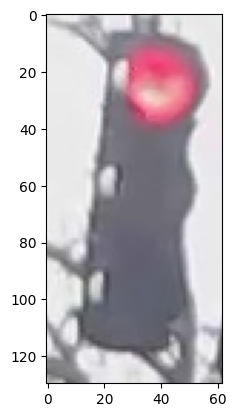

In [314]:
# The first image in IMAGE_LIST is displayed below (without information about shape or label)
selected_image = IMAGE_LIST[45][0]
plt.imshow(selected_image)        

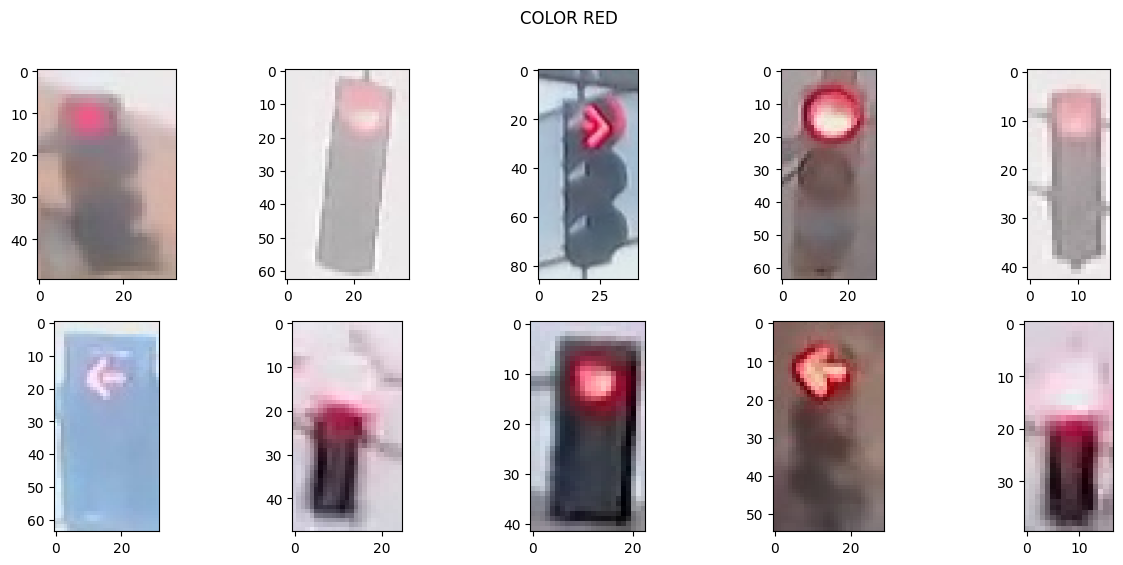

In [315]:
# Buscar las primeras 10 imágenes ROJAS
#OTRA FORMA DE EJECUTAR EL LOOP DE ABAJO --> #red_images = [x for x in IMAGE_LIST if x[1] == 'red'][:10]
red_images = []
count = 0
for img, label in IMAGE_LIST:
    if label == "red":
        red_images.append((img, label))
        count += 1
        if count == 10:
            break

#Se muestra 10 imagenes random en cada ejecucion
red_images = random.sample(red_images,10)

# Crear una figura para plotear las imágenes
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.ravel()

# Plotear las imágenes y sus etiquetas en la figura
for i in range(len(red_images)):
    img = red_images[i][0]
    label = red_images[i][1]
    fig.suptitle("COLOR RED")
    axs[i].imshow(img)
    #axs[i].set_title(label)
    #axs[i].axis('off')

# Mostrar la figura
plt.show()

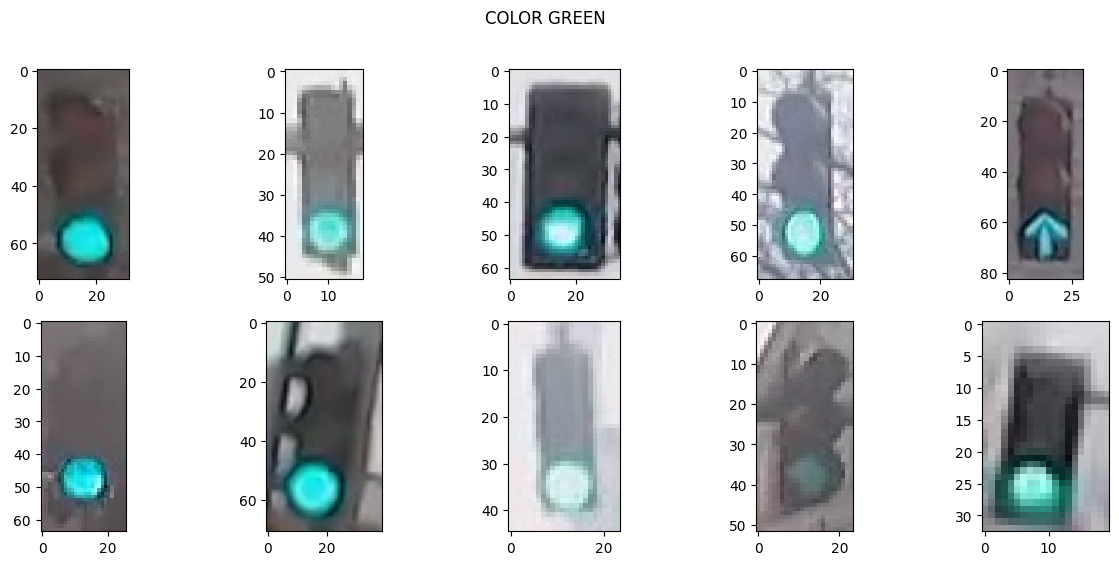

In [316]:
# Buscar las primeras 10 imágenes VERDES
#OTRA FORMA DE EJECUTAR EL LOOP DE ABAJO -->green_images = [x for x in IMAGE_LIST if x[1] == 'green'][:10]
green_images = []
count = 0
for img, label in IMAGE_LIST:
    if label == "green":
        green_images.append((img, label))
        count += 1
        if count == 10:
            break
#Se muestra 10 imagenes random en cada ejecucion
green_images = random.sample(green_images,10)

# Crear una figura para plotear las imágenes
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.ravel()

# Plotear las imágenes y sus etiquetas en la figura
for i in range(len(green_images)):
    img = green_images[i][0]
    label = green_images[i][1]
    fig.suptitle("COLOR GREEN")
    axs[i].imshow(img)
    #axs[i].set_title(label)
    #axs[i].axis('off')

# Mostrar la figura
plt.show()

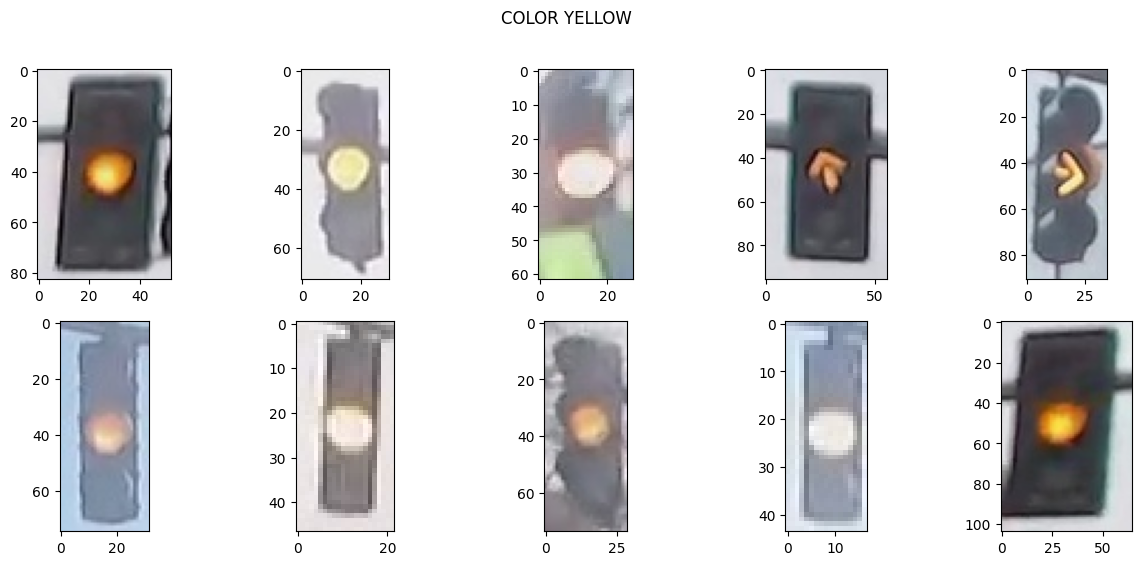

In [317]:
# Buscar las primeras 10 imágenes AMARILLAS
#OTRA FORMA DE EJECUTAR EL LOOP DE ABAJO --> #yellow_images = [x for x in IMAGE_LIST if x[1] == 'yellow'][:10]
yellow_images = []
count = 0
for img, label in IMAGE_LIST:
    if label == "yellow":
        yellow_images.append((img, label))
        count += 1
        if count == 10:
            break

#Se muestra 10 imagenes random en cada ejecucion
yellow_images = random.sample(yellow_images,10)

# Crear una figura para plotear las imágenes
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.ravel()

# Plotear las imágenes y sus etiquetas en la figura
for i in range(len(yellow_images)):
    img = yellow_images[i][0]
    label = yellow_images[i][1]
    fig.suptitle("COLOR YELLOW")
    axs[i].imshow(img)
    #axs[i].set_title(label)
    #axs[i].axis('off')

# Mostrar la figura
plt.show()

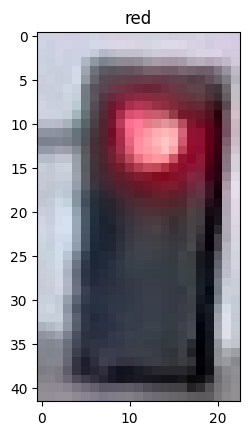

Shape: (42, 23, 3)
Label: red


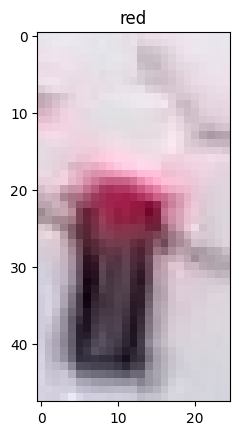

Shape: (48, 25, 3)
Label: red


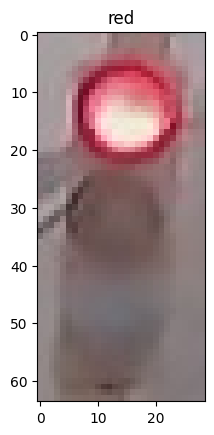

Shape: (64, 29, 3)
Label: red


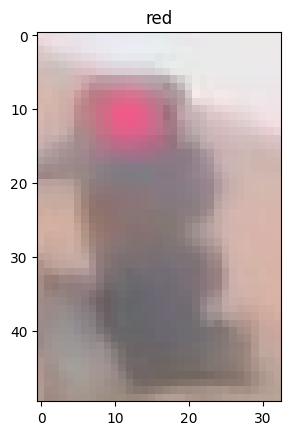

Shape: (50, 33, 3)
Label: red


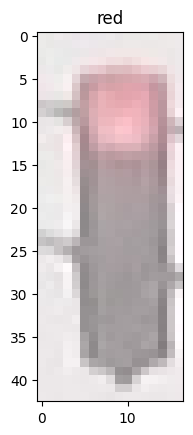

Shape: (43, 17, 3)
Label: red


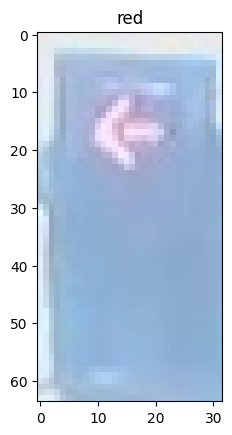

Shape: (64, 32, 3)
Label: red


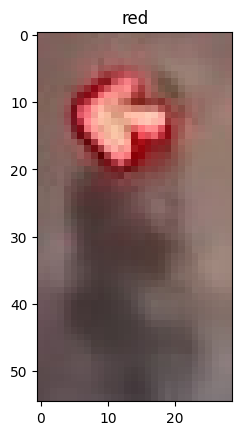

Shape: (55, 29, 3)
Label: red


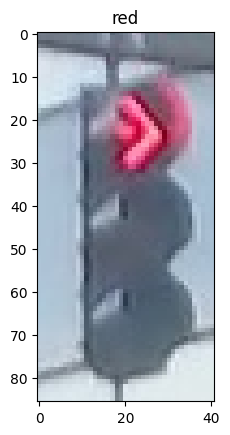

Shape: (86, 41, 3)
Label: red


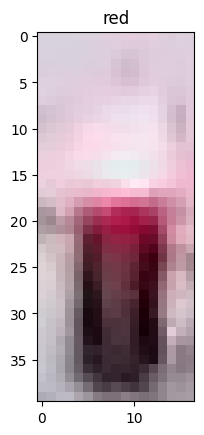

Shape: (40, 17, 3)
Label: red


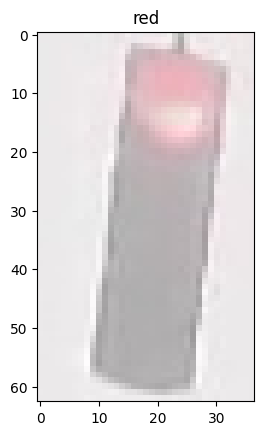

Shape: (63, 37, 3)
Label: red


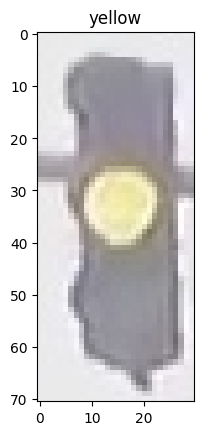

Shape: (71, 30, 3)
Label: yellow


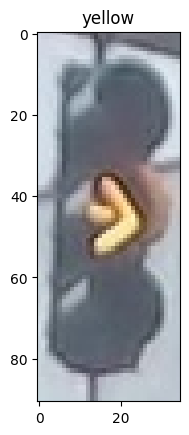

Shape: (91, 35, 3)
Label: yellow


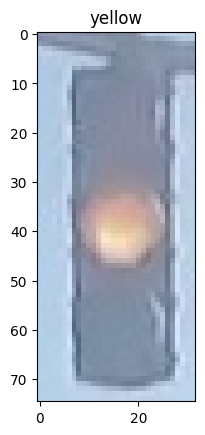

Shape: (75, 32, 3)
Label: yellow


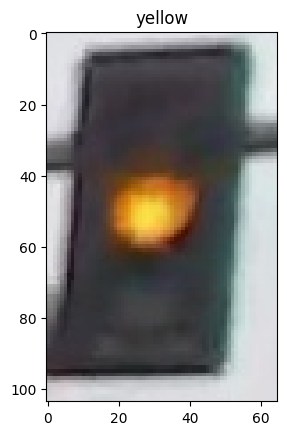

Shape: (104, 65, 3)
Label: yellow


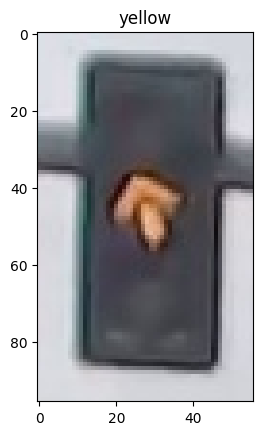

Shape: (96, 56, 3)
Label: yellow


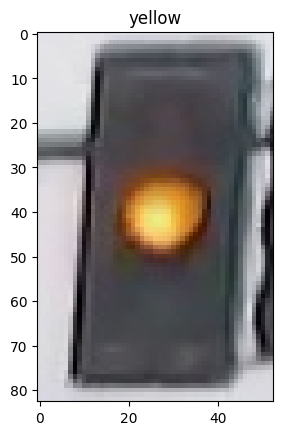

Shape: (83, 53, 3)
Label: yellow


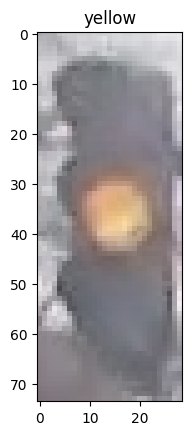

Shape: (74, 29, 3)
Label: yellow


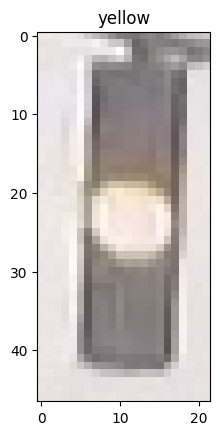

Shape: (47, 22, 3)
Label: yellow


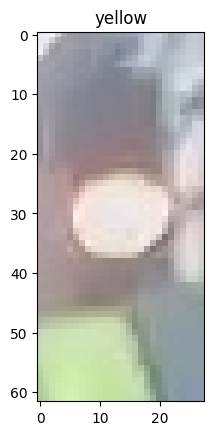

Shape: (62, 28, 3)
Label: yellow


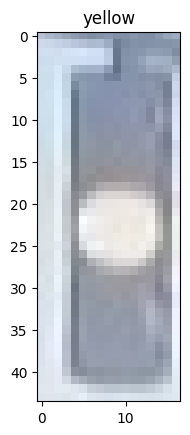

Shape: (44, 17, 3)
Label: yellow


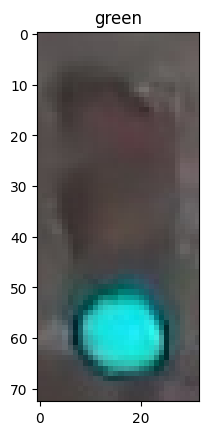

Shape: (73, 32, 3)
Label: green


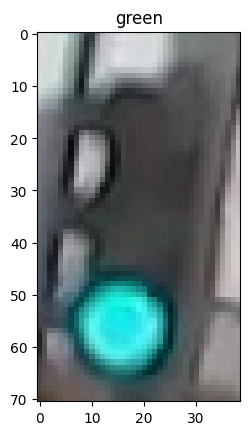

Shape: (71, 39, 3)
Label: green


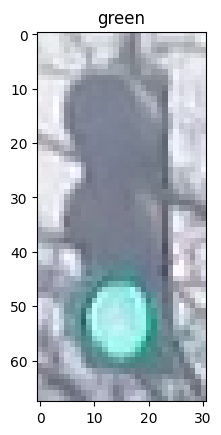

Shape: (68, 31, 3)
Label: green


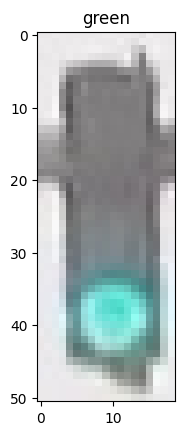

Shape: (51, 19, 3)
Label: green


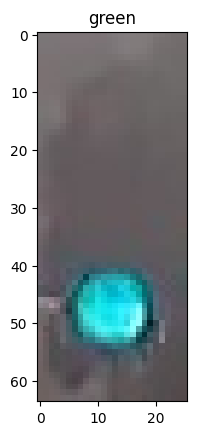

Shape: (64, 26, 3)
Label: green


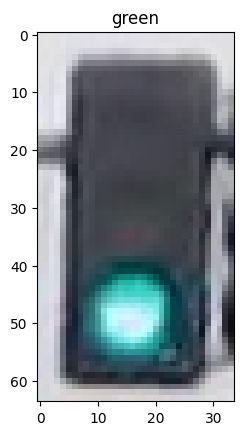

Shape: (64, 34, 3)
Label: green


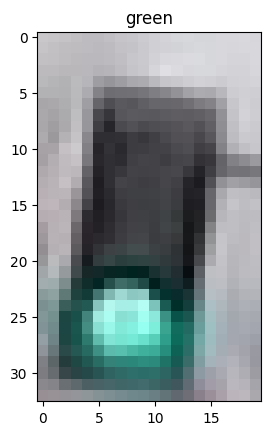

Shape: (33, 20, 3)
Label: green


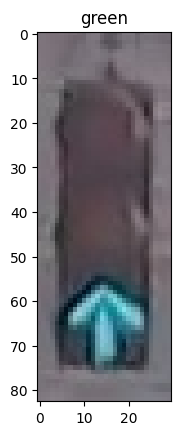

Shape: (83, 30, 3)
Label: green


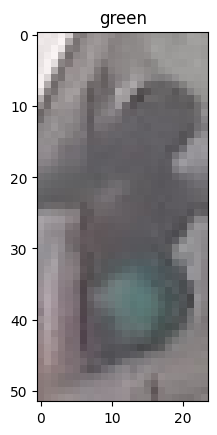

Shape: (52, 24, 3)
Label: green


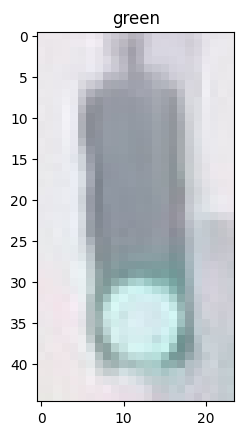

Shape: (45, 24, 3)
Label: green


In [318]:
# Iterate through each color type
colors = ["red", "yellow", "green"]

for color in colors:
    
    count = 0  # keep track of number of images displayed
    
    # Iterate through each image-label pair in IMAGE_LIST
    for i in range(len(IMAGE_LIST)):
        if IMAGE_LIST[i][1] == color:
            # Display the image
            plt.imshow(IMAGE_LIST[i][0])
            plt.title(color)
            plt.show()
            
            # Print out the shape of the image
            print("Shape:", IMAGE_LIST[i][0].shape)
            
            # Print out the label of the image
            print("Label:", IMAGE_LIST[i][1])
            
            count += 1
            if count >= 10:  # show 10 images of each color
                break
#Este código muestra diez imágenes de cada tipo (rojo, verde y amarillo) y para cada imagen muestra su forma y su etiqueta asociada.

In [319]:
# TODO: Show 10 red iamges with its lables

In [320]:
# TODO: Show 10 yellow images with its labels

In [321]:
# TODO: Show 10 green images with its labels

# 2. Pre-process the Data

Las imágenes de entrada y las labels de salida deben estandarizarse. De esta forma, se puede analizar todas las imágenes de entrada utilizando la misma pipeline de clasificación y se sabe qué salida esperar cuando finalmente se clasifique una imagen **nueva**.

## Standardize the input and output!

<img src="images/processing_steps.png" width="80%" height="80%">


---
### TODO: Standardize the input images

### Input

Es importante que **imágenes similares creen características similares**! Por esta razón, debemos cambiar el tamaño de entrada de cada imagen en nuestra pipeline.

Por lo tanto,

* Cambie el tamaño de cada imagen al tamaño de entrada deseado: 32x32px.
* (Optional) También puede optar por recortar, desplazar o rotar las imágenes en este paso.

Es muy común tener tamaños de entrada cuadrados que se pueden rotar (y mantener el mismo tamaño) y analizar en parches cuadrados más pequeños. También es importante hacer que todas sus imágenes tengan el mismo tamaño para que puedan enviarse a través de la misma pipeline de pasos de clasificación (vea nuestras lecciones y analice la pipeline)

In [322]:
def standardize_input(image):
    """
        Input: image - RGB image 
        Output: new standarized version of the image (usually square)
                in our case we should resize the image in 32x32 px
                this function may help you cv2.resize()
                do not forget to create a copy of the image before change its sizes
    """ 
    # Make a copy of the image
    standardized_image = np.copy(image)
    
    # Resize the image
    standardized_image = cv2.resize(standardized_image, dsize=(32, 32))
    ## TODO: Resize image and pre-process so that all "standard" images are the same size  
    return standardized_image


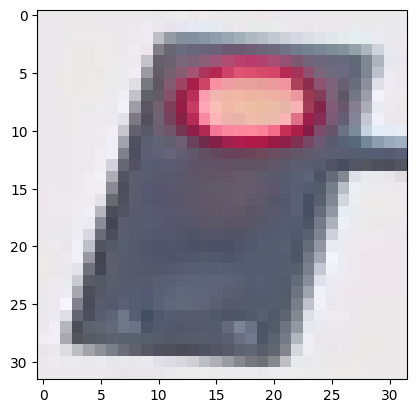

In [323]:
plt.imshow(standardize_input(IMAGE_LIST[10][0]))

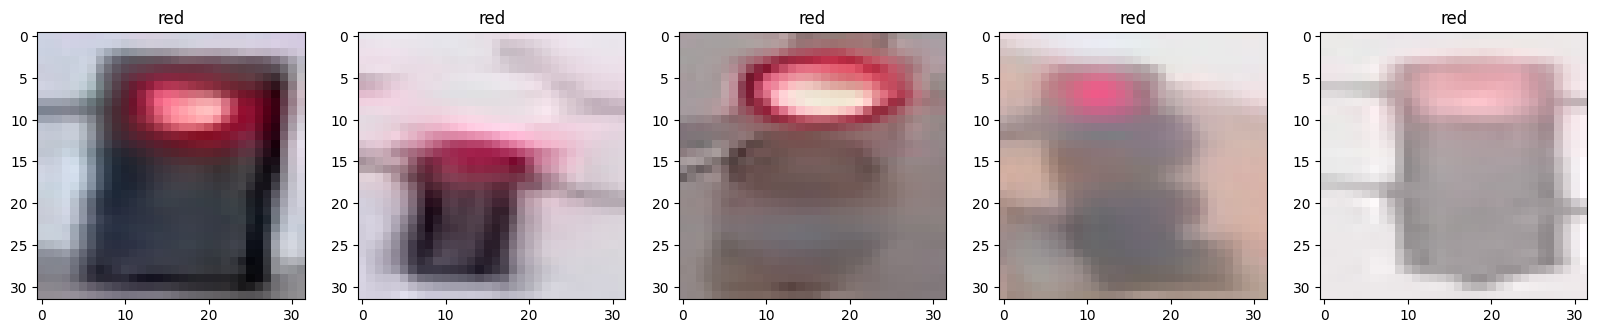

In [324]:
# Obtener una lista de imágenes
image_list = [(image, label) for image, label in IMAGE_LIST if label == "red"][:5]

# Redimensionar y pre-procesar las imágenes
resized_images = []
for image, label in image_list:
    resized_image = standardize_input(image)
    resized_images.append((resized_image, label))

# Mostrar las imágenes redimensionadas
fig, axs = plt.subplots(1, 5, figsize=(20, 10))
axs = axs.ravel()
for i in range(len(resized_images)):
    axs[i].imshow(resized_images[i][0])
    axs[i].set_title(resized_images[i][1])
plt.show()

### TODO: Standardize the output

### Output


Con cada imagen cargada, también especificamos el resultado esperado. Para esto, usamos **one-hot encoding**.

* One-hot encode los labels. Para hacer esto, cree una matriz de ceros que represente cada clase de semáforo (red, yellow, green) y establezca el índice del número de clase esperado en 1. 

Ya que tenemos tres clases (red, yellow, y green), se ha impuesto un orden de: `[red value, yellow value, green value]`. Al one-hot encode, entonces, una luz yellow, primero inicializaríamos una matriz para `[0, 0, 0]` y cambiar el valor medio (el yellow value) a 1: `[0, 1, 0]`.

Una luz red debe tener el label: `[1, 0, 0]`. Yellow debe ser: `[0, 1, 0]`. Green debe ser: `[0, 0, 1]`. Estas labels se llaman **one-hot encoded labels**.


*(Note: **one-hot encoding** will be especially important when you work with [machine learning algorithms](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)).*


---
### TODO one-hot encoding

In [325]:
def one_hot_encode(label):
    """
        Input: label - "red", "yellow", "green"
        Output: one-hot encoded label
        Examples: "red" => shoud return: [1, 0, 0]
                  "yellow" => shoud return: [0, 1, 0]
                  "green" => shoud return: [0, 0, 1]
    """
    ## TODO: Create a one-hot encoded label that works for all classes of traffic lights
    one_hot_encoded = [0, 0, 0]
    classes = ["red", "yellow", "green"]
    index = classes.index(label)
    one_hot_encoded[index] = 1
    
    
    return one_hot_encoded

print(one_hot_encode("red"))
print(one_hot_encode("yellow"))
print(one_hot_encode("green"))

[1, 0, 0]
[0, 1, 0]
[0, 0, 1]


### Testing

Si su `one_hot_label` code no funciona como se esperaba, esta prueba imprimirá un mensaje de error que le informará un poco sobre por qué falló su código. Una vez que su código funcione, esto debería imprimirse `TEST PASSED`.

In [326]:
#one_hot_encode("red")
one_hot_encode("yellow")
#one_hot_encode("green")

[0, 1, 0]

In [327]:
# Importing the tests
import test_functions
tests = test_functions.Tests()

# Test for one_hot_encode function
tests.test_one_hot(one_hot_encode)

**<span style="color: green;">TEST PASSED</span>**

## TODO: Construct a `STANDARDIZED_LIST` of input images and output labels.

Esta función toma una lista de `(image, label)` pares y devuelve una **standardized** list de `resized images` y `one-hot encoded labels`.

Esto utiliza las funciones que definió anteriormente para estandarizar la entrada y la salida, por lo que esas funciones deben estar completas para que esta estandarización funcione.

In [328]:
def standardize(image_list):
    """
        Input: List of (img, label) pairs
        Output: list of (standardized images, onehot encoded labels)
    """
    
    # Empty image data array
    standard_list = []

    # TODO: Iterate through all the image-label pairs
    for img, label in image_list:
    #     1. Standardize the image
        standardize_image = standardize_input(img)
    #     2. One-hot encode the label
        one_hot_encode_label = one_hot_encode(label)
    #     3. Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardize_image, one_hot_encode_label))
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)
print(STANDARDIZED_LIST[0])

(array([[[205, 211, 227],
        [206, 210, 227],
        [208, 209, 227],
        ...,
        [214, 204, 228],
        [213, 203, 227],
        [211, 201, 225]],

       [[204, 210, 226],
        [203, 209, 225],
        [205, 208, 225],
        ...,
        [214, 205, 225],
        [212, 203, 224],
        [212, 202, 225]],

       [[202, 209, 225],
        [201, 208, 224],
        [202, 208, 224],
        ...,
        [195, 186, 203],
        [202, 193, 211],
        [209, 201, 218]],

       ...,

       [[127, 125, 133],
        [128, 127, 135],
        [128, 127, 135],
        ...,
        [128, 127, 133],
        [139, 138, 143],
        [144, 142, 147]],

       [[139, 135, 142],
        [138, 135, 142],
        [136, 134, 141],
        ...,
        [127, 125, 129],
        [137, 136, 140],
        [144, 143, 146]],

       [[147, 142, 149],
        [147, 142, 149],
        [148, 143, 150],
        ...,
        [133, 131, 134],
        [141, 139, 142],
        [146, 144, 147]

## Visualize the standardized data

Muestre una imagen estandarizada de `STANDARDIZED_LIST` y compárela con una imagen no estandarizada de `IMAGE_LIST`. Tenga en cuenta que sus tamaños y apariencia son diferentes!

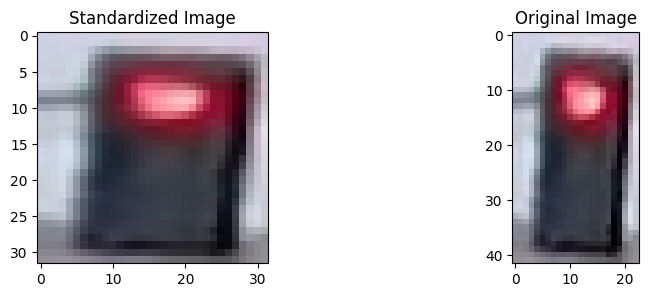

In [329]:
## TODO: Display a standardized image and its label
##       Compare it with the IMAGE_LIST and its label
# Seleccionar una imagen aleatoria de la lista estandarizada
sample = random.choice(STANDARDIZED_LIST)


# Obtener la imagen y la etiqueta
image = sample[0]
label = sample[1]
# Mostrar la imagen y la etiqueta
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs = axs.ravel()
axs[0].imshow(STANDARDIZED_LIST[0][0])
axs[0].set_title("Standardized Image")
axs[1].imshow(IMAGE_LIST[0][0])
axs[1].set_title("Original Image")
plt.show()

# 3. Feature Extraction

A continuación, se extraerá algunas características de cada imagen que ayudarán a distinguir y eventualmente clasificar estas imágenes.

Usará lo que sabe sobre espacios de color, análisis de formas, features y descriptores para crear features que ayuden a distinguir y clasificar los tres tipos de imágenes de semáforos.

Se tiene la tarea de crear al menos **one feature** como minimo (con la opción de crear más. Intente experimentar con diferentes características). 

La feature requerida:

1. Extraer al menos una features
    - Piense siempre en el enfoque: `qué funciona y qué no? Por que?`

2. (Optional): Crea mas features

Cualquier característica adicional que cree depende de usted y esto debería mejorar la precisión de su algoritmo de clasificación de semáforos!

Recuerde, **nunca debe clasificar un semáforo en rojo como un semáforo en verde** `Piense por que esto es mala idea!!`. Para evitar esta clasificación errónea, podría considerar agregar otra feature que distinga específicamente entre luces `red` y `green`.

## Creating a feature 

Hay varias formas de crear una feature que ayudará a caracterizar las imágenes de los semáforos, y será usted quien decida cuál es el mejor procedimiento para completar este paso. Debe visualizar y probar su código a medida que avanza.

**Hint** El HSV channel e histograms nos podrian ayudar a extraer una buena caracteristica. Pero, piense por que esto es buena idea?


## TODO:

- Experimente con los canales de color y verifique si cuales características son mejores para esta tarea.
- Puede probar diferentes valores en su máscara para cada canal.
- Aquí, por favor, experimente tanto como sea posible y explique su pensamiento, ¿por qué? ¿qué? ¿y cómo?

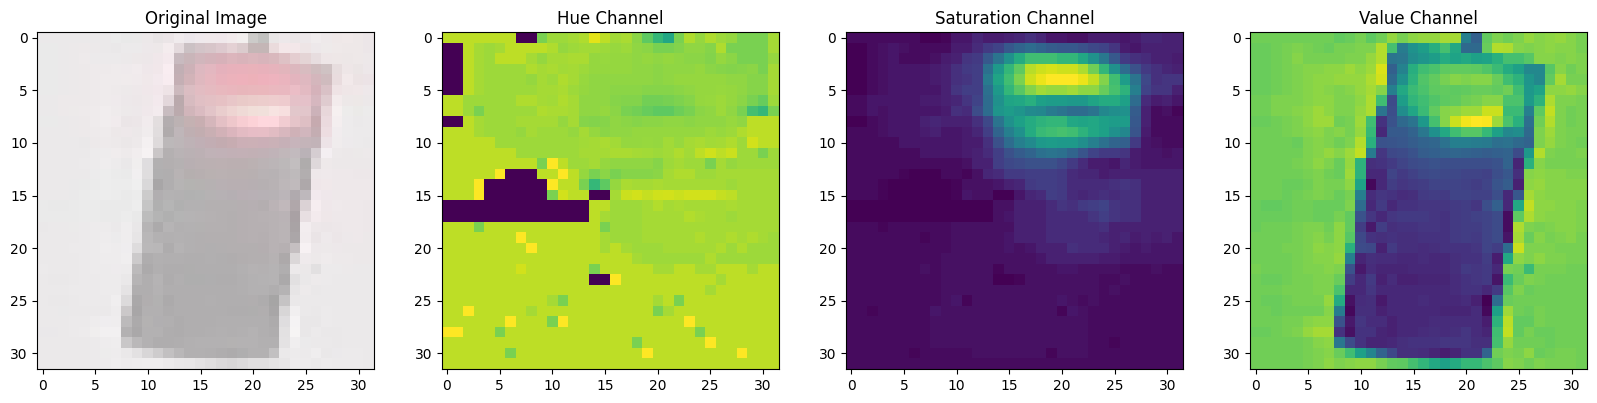

In [330]:
images = STANDARDIZED_LIST[random.randint(0,100)][0]
image_copy =images.copy()
image_hsv = cv2.cvtColor(image_copy, cv2.COLOR_BGR2HSV)
imageH = image_hsv[:,:,0]
imageS= image_hsv[:,:,1]
imageV = image_hsv[:,:,2]
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(image_copy);
plt.title("Original Image")
plt.subplot(142)
plt.imshow(imageH);
plt.title("Hue Channel")
plt.subplot(143)
plt.imshow(imageS);
plt.title("Saturation Channel")
plt.subplot(144)
plt.imshow(imageV);
plt.title("Value Channel");

In [331]:
images = IMAGE_LIST[0][0]
image_copy =images.copy()
imagehsv = cv2.cvtColor(image_copy, cv2.COLOR_BGR2HSV)
images_hsv=[]
h, s, v = cv2.split(imagehsv)

Text(0.5, 1.0, 'monarch')

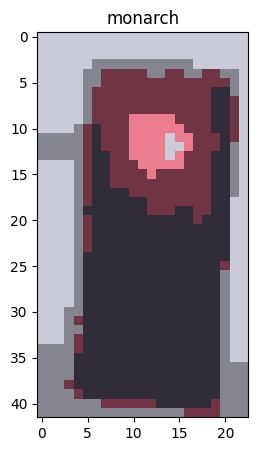

In [332]:
SEMAFORO_RESHAPE = image_copy.reshape((-1, 3))
SEMAFORO32 = np.float32(SEMAFORO_RESHAPE)
# Definir los criterios de parada para el algoritmo K-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.2)

# Selec1ionar un valor para k (número de clusters)
k = 5

# Ejecutar K-means clustering
retval, labels, centers = cv2.kmeans(SEMAFORO32, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convertir los datos de vuelta a valores de 8 bits (np.uint8)
centers = np.uint8(centers)
resized_image = centers[labels.flatten()]

# Reshape los datos a las dimensiones originales de la imagen
resized_image2 = resized_image.reshape((images.shape))
resized_labels = labels.reshape(images.shape[0], images.shape[1])

plt.figure(figsize=(5,5))
plt.imshow(resized_image2);
plt.title("monarch")

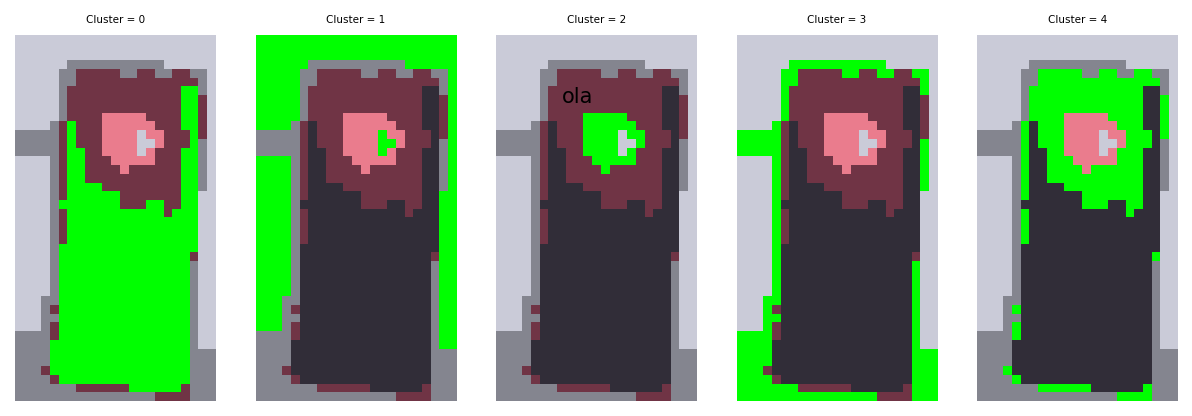

In [333]:
# TODO
cluster = 5    # the first cluster

fig = plt.figure(figsize=(10,5), dpi=150)
for i in range(cluster):
    resized_labels_copy =resized_image2.copy()
    fig.add_subplot(1,cluster,i+1)
    new_mask = resized_labels == i
    resized_labels_copy [new_mask>0] = [0,255,0] 
    plt.imshow(resized_labels_copy)
    plt.axis('off') #PARA QUITAR LOS EJES X y Y
    plt.title(f'Cluster = {i}', fontsize = 5)

    if i == 0:
        mask_0 = new_mask
    elif i == 3:
        mask_3 = new_mask
fig.suptitle("ola", fontsize=10)
plt.subplots_adjust(top=1.5) #distancia de titulo grande y chico


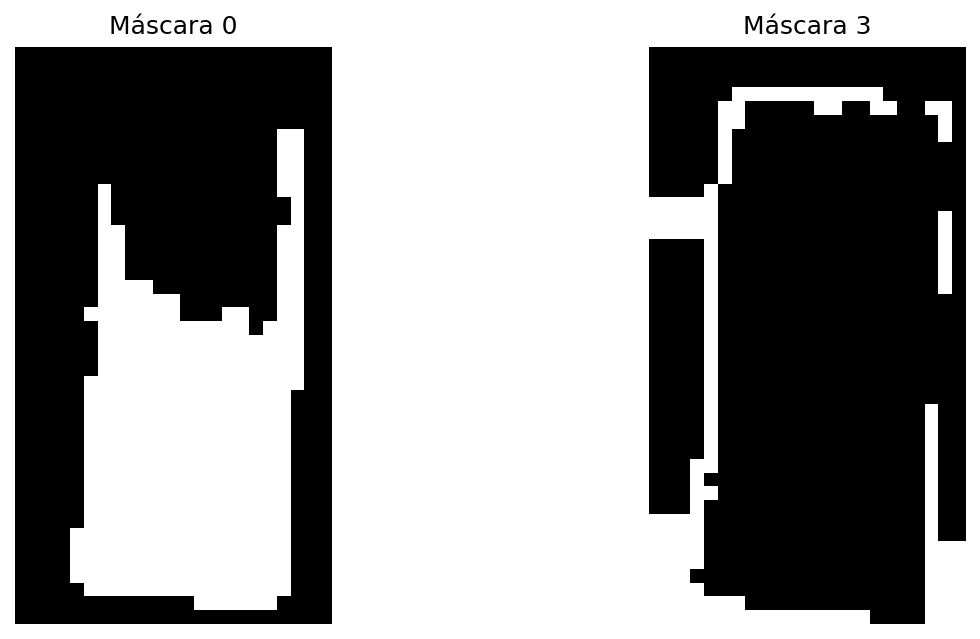

In [334]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), dpi=150)

# Plotear mask_0 en la primera columna
axes[0].imshow(mask_0, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Máscara 0')

# Plotear mask_3 en la segunda columna
axes[1].imshow(mask_3, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Máscara 3')

plt.show()
sumaaa =mask_0+mask_3

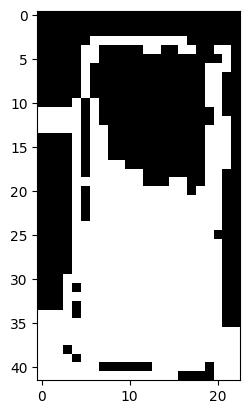

In [335]:
plt.imshow(sumaaa, cmap='gray')

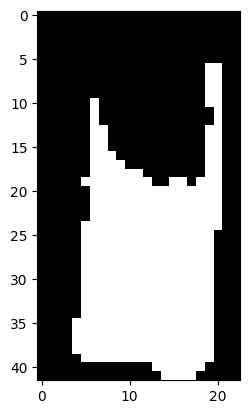

In [336]:
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
#cierre = cv2.morphologyEx(mask_0, cv2.MORPH_CLOSE, kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
cierre = cv2.morphologyEx(mask_0.astype('uint8'), cv2.MORPH_CLOSE, kernel)
plt.imshow(cierre,cmap='gray')

---
### TODO: Create a feature that uses HSV color space

In [363]:
def create_feature(rgb_image):
    """
        Input: RGB image
        Output: 1D feature vector, single value. This will help classify an image of a traffic light
        Note: From this, you should be able to estimate an image's lable and classify it 
    """
    ## TODO: Convert image to HSV color space
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    ## TODO: Create feature based on color space
    lower_red = np.array([0, 70, 50])
    upper_red = np.array([10, 255, 255])
    lower_yellow = np.array([25, 70, 50])
    upper_yellow = np.array([35, 255, 255])
    lower_green = np.array([50, 70, 50])
    upper_green = np.array([70, 255, 255])

    # Obtener máscaras para cada rango de color
    red_mask = cv2.inRange(hsv_image, lower_red, upper_red)
    yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
    green_mask = cv2.inRange(hsv_image, lower_green, upper_green)
    
    # Calcular el número de píxeles que pertenecen a cada máscara
    red_pixels = np.sum(red_mask)
    yellow_pixels = np.sum(yellow_mask)
    green_pixels = np.sum(green_mask)
    
    # Calcular la proporción de píxeles para cada color
    total_pixels = red_pixels + yellow_pixels + green_pixels
    red_ratio = red_pixels / total_pixels
    yellow_ratio = yellow_pixels / total_pixels
    green_ratio = green_pixels / total_pixels

    ## TODO: Create and return a feature value and/or vector
    feature = []
    
    # if the feature is close to red color compared with yellow and green
    #    then return feature [1, 0, 0] 
    # do this with the diferent features
    if red_ratio > yellow_ratio and red_ratio > green_ratio:
        feature = [1, 0, 0]  # Rojo
    elif yellow_ratio > red_ratio and yellow_ratio > green_ratio:
        feature = [0, 1, 0]  # Amarillo
    else:
        feature = [0, 0, 1]  # Verde
    
    
    return feature


In [367]:
# Test your create_feature function
# Ejemplo de imagen de semáforo rojo


# red_image = IMAGE_LIST[random.randint(0,100)][0]
# plt.imshow(red_image)
# # # Extraer característica
# red_feature = create_feature(red_image)
# print("Red feature:", red_feature)

# # Ejemplo de imagen de semáforo amarillo
# yellow_image = IMAGE_LIST[random.randint(0,100)][0]
# plt.imshow(yellow_image)

# # Extraer característica
# yellow_feature = create_feature(yellow_image)
# print("Yellow feature:", yellow_feature)

image = IMAGE_LIST[random.randint(0,100)][0]
# Preprocess image
image = cv2.resize(image, (32, 32))
image = image / 255.0

# Get feature vector
feature = create_feature(image)

# Check feature vector
if feature == [1, 0, 0]:
    print("Traffic light is red.")
elif feature == [0, 1, 0]:
    print("Traffic light is yellow.")
else:
    print("Traffic light is green.")


# # Ejemplo de imagen de semáforo verde
# green_image = plt.imread("green_light.jpg")
# plt.imshow(green_image)

# # Extraer característica
# green_feature = create_feature(green_image)
# print("Green feature:", green_feature)

# Lista de imágenes
#IMAGE_LIST = ['red_light.jpg', 'yellow_light.jpg', 'green_light.jpg']

# Procesar cada imagen y mostrar la característica correspondiente

error: OpenCV(4.7.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x416a7d27::Set<3,-1,-1>,struct cv::impl::A0x416a7d27::Set<0,5,-1>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


## (Optional) Create more features to help accurately label the traffic light images

In [339]:
# (Optional) Add more image analysis and create more features

### (QUESTION): ¿Cómo te ayudan las features que creaste a distinguir entre las 3 clases de imágenes de semáforos? Por que este metodo funciona? 

**Answer:**


# 4. Classification and Visualizing Error 

Esta función de clasificación debería poder clasificar cualquier imagen de un semáforo.

---
### TODO: Build a complete classifier

In [340]:
def estimate_label(rgb_image):
    """
        Input: RGB image
        Output: one hot encoded label, this gonna be our prediction to that input image
    """
    
    # TODO: 
    predicted_label = ...
    
    return predicted_label   
    

## Testing the classifier

Aquí es donde se prueba su algoritmo de clasificación utilizando el test dataset que se guarda al comienzo de la notebook! Este laboratorio se completará una vez que haya programado un clasificador "bueno".

### Requirements for a good classifier
1. Get above 90% classification accuracy.
2. Never classify a red light as a green light. 

### TODO: Load Test dataset

1. load in the test dataset
2. standardize it using the `standardize` function you defined above, 
3. **shuffle** it; this ensures that order will not play a role in testing accuracy.

see `random.shuffle`


In [341]:
# TODO

## Determine the Accuracy

Compare la salida de su algoritmo de clasificación (también conocido como su `"modelo"`) con las labels verdaderas y determine la `accuracy`.

Esta funcion debera almacenar todas las imágenes mal clasificadas, sus labels predichas y sus labels verdaderas, en una lista llamada `MISCLASSIFIED`. Asegurese que esta funcion devuelva una lista de tuples en el siguiente orden `(misclassified_image, predicted_label, true_label)`. Esto es importante ya que las pruebas mas adelante requieren este orden. 

Para calcular la `accuracy`:

$$
accuracy = \frac{total\_test\_imgs - missclassified\_imgs}{total}
$$

In [342]:
def get_misclassified_images(test_images):
    """
        Input: test_images - list of test images and their labels
                This will throw an AssertionError if labels are not standardized
        Output: list of tuples with the order: [misclassified_image, predicted_label, true_label]
    """
    
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # TODO: Iterate through all the test images
    #       Classify each image and compare to the true label

        # 1. Get true data

        assert(len(true_label) == 3), "The true_label is not the expected length (3)."

        # 2. Get predicted label from your classifier

        assert(len(predicted_label) == 3), "The predicted_label is not the expected length (3)."

        # 3. Compare true and predicted labels 
        
            # If these labels are not equal, the image has been misclassified
            
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


# TODO: Find all misclassified images in a given test set
MISCLASSIFIED = ...

# TODO: Accuracy calculations (See equation above)
total = ...
num_correct = ...
accuracy = ...

# Print Accuracy and number of misclassified images
print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

IndentationError: unexpected indent (2982343118.py, line 16)

---
### Visualize the misclassified images

Visualice algunas de las imágenes que clasificó incorrectamente (en la lista `MISCLASSIFIED`) y anote cualquier característica que las haga difíciles de clasificar.

Esto lo ayudará a identificar cualquier debilidad en su algoritmo de clasificación. Intente mejorarlo!!

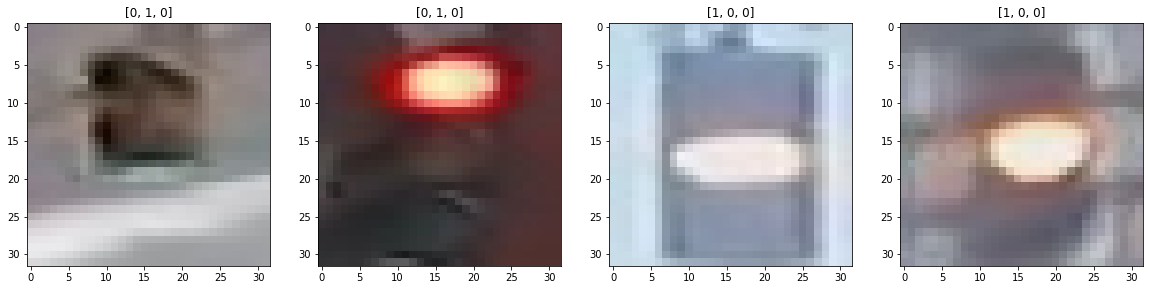

In [ ]:
## TODO: Display an image in the `MISCLASSIFIED` list 
## TODO: Print out its predicted label - to see what the image *was* incorrectly classified as

---
## (Question 2): Después de visualizar estas clasificaciones erróneas, ¿qué debilidades cree que tiene su algoritmo de clasificación? Tenga en cuenta al menos dos. Como podria mejorarlo?

**Answer:**

## Test if you classify any red lights as green

Recuerde nuestros requisitos!!! - Piense ¿por qué es peligroso clasificar una luz roja como una luz verde?

El siguiente código le permite probar su codigo anterior para ver si ha clasificado incorrectamente alguna luz roja como verde en el test set. 

**This test assumes that `MISCLASSIFIED` is a list of tuples with the order: [misclassified_image, predicted_label, true_label].**

In [ ]:
# Importing the tests
import test_functions
tests = test_functions.Tests()

if(len(MISCLASSIFIED) > 0):
    # Test code for one_hot_encode function
    tests.test_red_as_green(MISCLASSIFIED)
else:
    print("MISCLASSIFIED may not have been populated with images.")

**<span style="color: green;">TEST PASSED</span>**

# 5. Improve your algorithm!

**Remember our requirements:**
1. Greater than 90% accuracy classification
2. No red lights classified as green

Si no cumplió con estos requisitos (lo cual es común en el primer intento), revise su algoritmo y modifíquelo para mejorar la clasificacion del coloe de la luz; esto podría significar cambiar la función de brillo, realizar alguna sustracción de fondo o agregar otra feature.

---

### Going Further (Optional Challenges)

Si le resultó fácil este lab, te sugiero que vayas más allá! Aquí hay un par de sugerencias **opcionales** (lo que significa que no necesita implementarlas para enviar):

* (Optional) Apunte a una precisión de clasificación >95 %.
* (Optional) Algunas luces tienen forma de flechas; Clasifique además las luces como redondas o en forma de flecha.
* (Optional) Agregue otra característica y apunte a una precisión tan cercana al 100% como pueda!